In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df.drop(['area_type','availability','society','balcony'],axis='columns')

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['BHK']=df3['size'].apply(lambda x :int(x.split(' ')[0]))
df3['Bedroom']=df3['size'].apply(lambda x :x.split(' ')[0])

C:\Users\starnet\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\starnet\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df3.head()

,location,size,total_sqft,bath,price,BHK,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,3
4,Kothanur,2 BHK,1200,2.0,51.00,2,2


In [15]:
df3.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3['BHK']>20]

,location,size,total_sqft,bath,price,BHK,Bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43,43


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(total_sqft):
    try:
        float(total_sqft)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK,Bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,2


In [20]:
def covert_total_sqft(x):
    tokens=x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [21]:
df4=df3.copy()
df4['total_sqft']=df3["total_sqft"].apply(covert_total_sqft)
df4.head()

,location,size,total_sqft,bath,price,BHK,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2


In [22]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [23]:
df5.head()

,location,size,total_sqft,bath,price,BHK,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
df5["location"]=df5["location"].apply(lambda x:x.strip())

In [26]:
location_state=df5.groupby("location")['location'].agg('count').sort_values(ascending=False)

In [27]:
location_state

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [28]:
location_state=df5.groupby("location")['location'].value_counts().sort_values(ascending=False)

In [29]:
location_state

location           location         
Whitefield         Whitefield           535
Sarjapur  Road     Sarjapur  Road       392
Electronic City    Electronic City      304
Kanakpura Road     Kanakpura Road       266
Thanisandra        Thanisandra          236
                                       ... 
LIC Colony         LIC Colony             1
Kuvempu Layout     Kuvempu Layout         1
Kumbhena Agrahara  Kumbhena Agrahara      1
Kudlu Village,     Kudlu Village,         1
1 Annasandrapalya  1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [30]:
len(location_state[location_state<=10])

1052

In [31]:
location_state_less_than_10=location_state[location_state<=10]
location_state_less_than_10

location             location           
BTM 1st Stage        BTM 1st Stage          10
Basapura             Basapura               10
Sector 1 HSR Layout  Sector 1 HSR Layout    10
Naganathapura        Naganathapura          10
Kalkere              Kalkere                10
                                            ..
LIC Colony           LIC Colony              1
Kuvempu Layout       Kuvempu Layout          1
Kumbhena Agrahara    Kumbhena Agrahara       1
Kudlu Village,       Kudlu Village,          1
1 Annasandrapalya    1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [32]:
len(df5.location.unique())

1293

In [33]:
df5.location=df5.location.apply(lambda x :'other'if x in location_state_less_than_10 else x)

In [34]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [35]:
len(df5.location.unique())

242

In [36]:
df5.head(12)

,location,size,total_sqft,bath,price,BHK,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,6,36274.509804


In [37]:
bhk_less_than_300_sqft=df5[df5.total_sqft/df5.BHK<300]
len(bhk_less_than_300_sqft)

744

In [38]:
bhk_less_than_300_sqft.head()

,location,size,total_sqft,bath,price,BHK,Bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,3,20000.000000


In [39]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [40]:
df6.head()

,location,size,total_sqft,bath,price,BHK,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000


In [41]:
df6.shape

(12502, 8)

In [42]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key , subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        sdt=np.std(subdf.price_per_sqft)
        reduce=subdf[(subdf.price_per_sqft>(m-sdt)) & (subdf.price_per_sqft<=(m+sdt))]
        df_out=pd.concat([df_out,reduce],ignore_index=True)
    return df_out

In [44]:
df7=remove_pps_outliers(df6)
df7.shape

(10241, 8)

In [45]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,label='2 bhk',color='blue',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,label='3 bhk',marker="+",color='green',s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('price_per_sqft')
    plt.title(location)
    plt.legend()
    

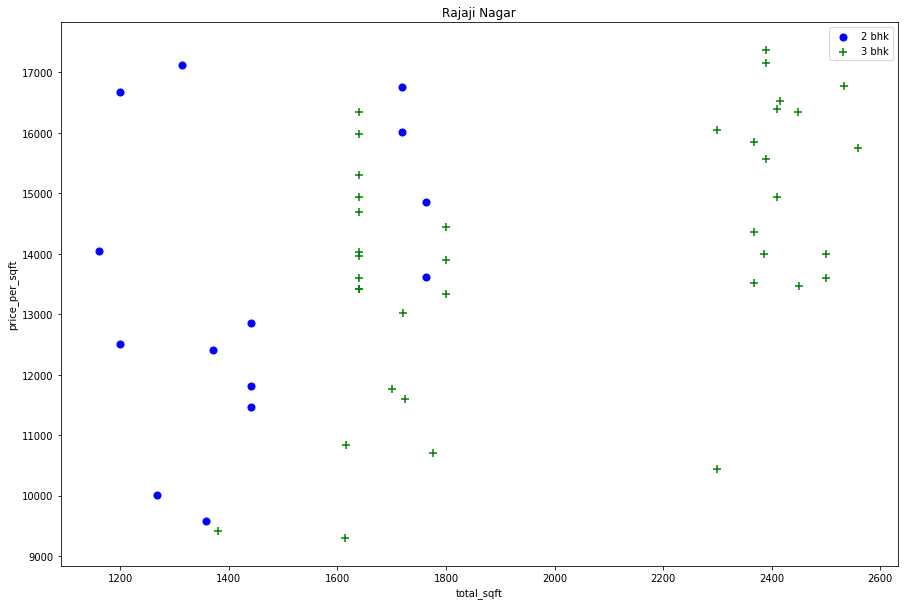

In [46]:
plot_scatter_chart(df7,'Rajaji Nagar')

In [47]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,label='2 bhk',color='blue',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,label='3 bhk',marker="+",color='green',s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
    

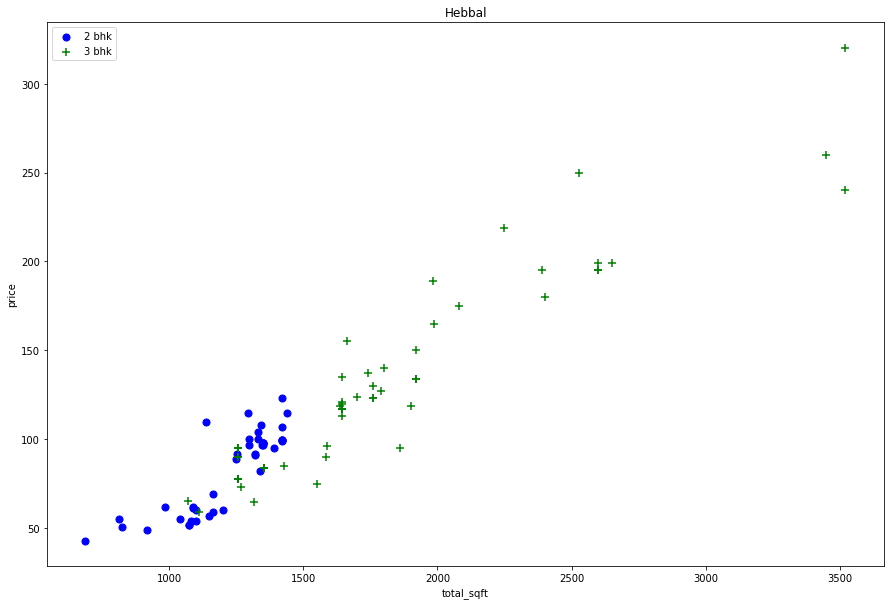

In [48]:
plot_scatter_chart(df7,'Hebbal')

In [49]:
def remove_hbk_outlier(df):
    exclude_indices=np.array([])
    for location ,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [50]:
df8=remove_hbk_outlier(df7)

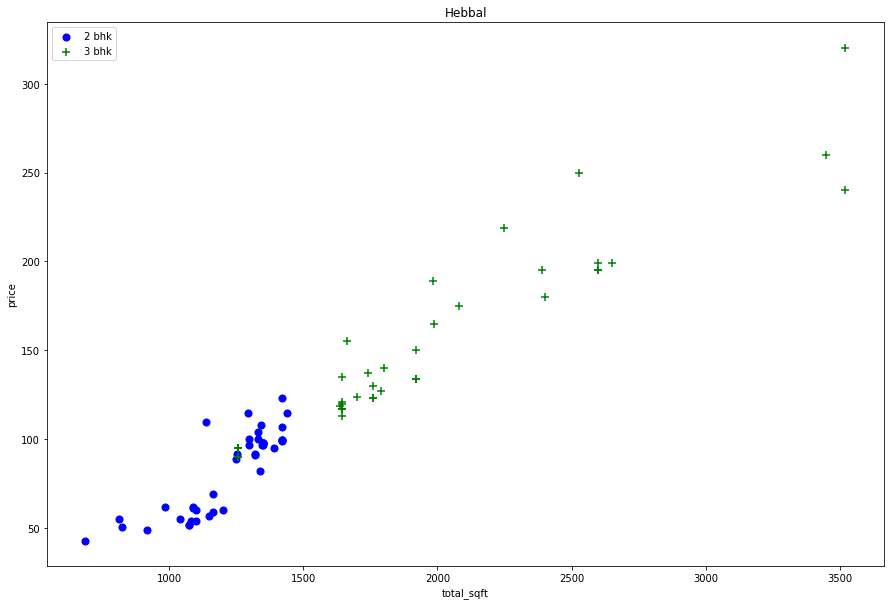

In [51]:
plot_scatter_chart(df8,'Hebbal')

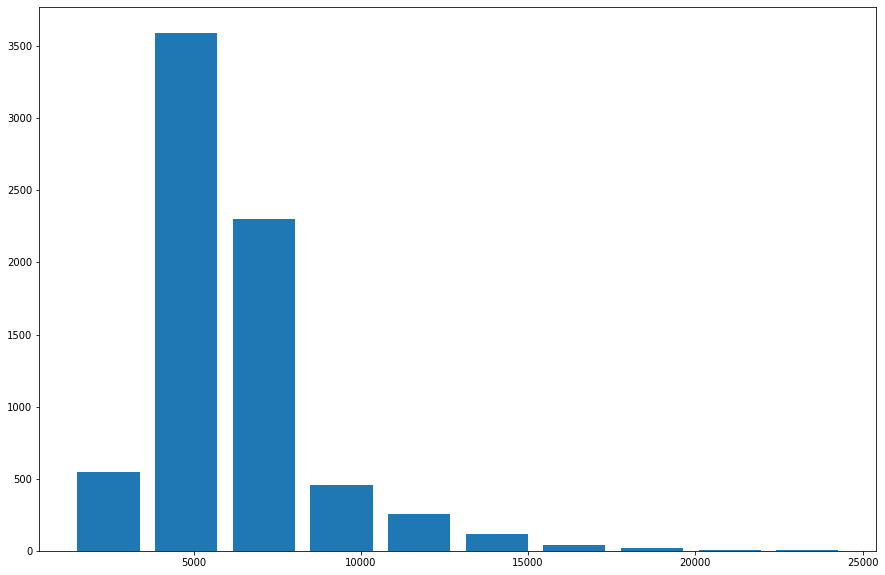

In [52]:
plt.hist(df8.price_per_sqft,rwidth=.8);

In [53]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,Bedroom,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,13,5069.124424


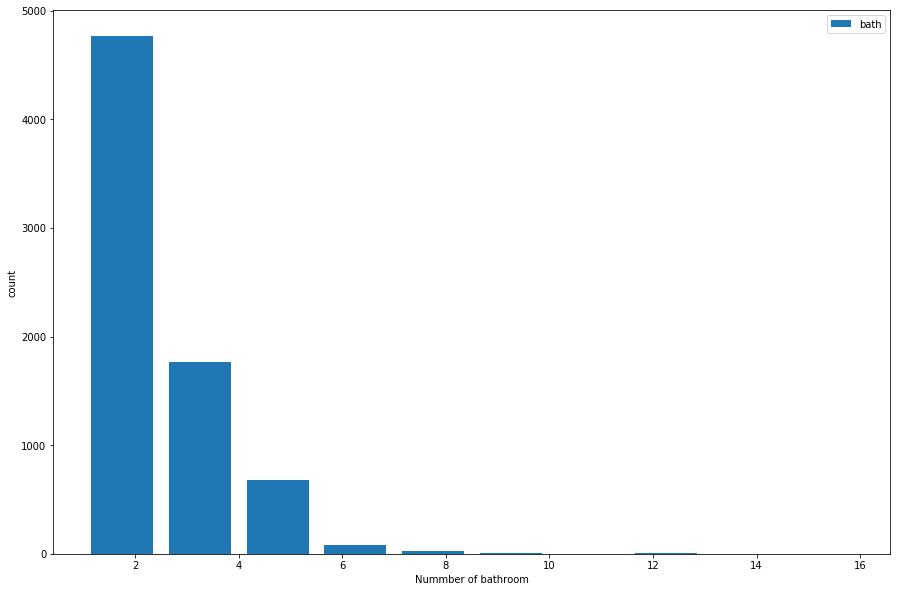

In [55]:
df8.bath.plot(kind="hist",rwidth=.8).ascending=True
plt.xlabel("Nummber of bathroom")
plt.ylabel("count")
plt.legend()

In [56]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,Bedroom,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,6,8819.897689


In [57]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 8)

In [282]:
df10=df9.drop(['size','price_per_sqft','Bedroom'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


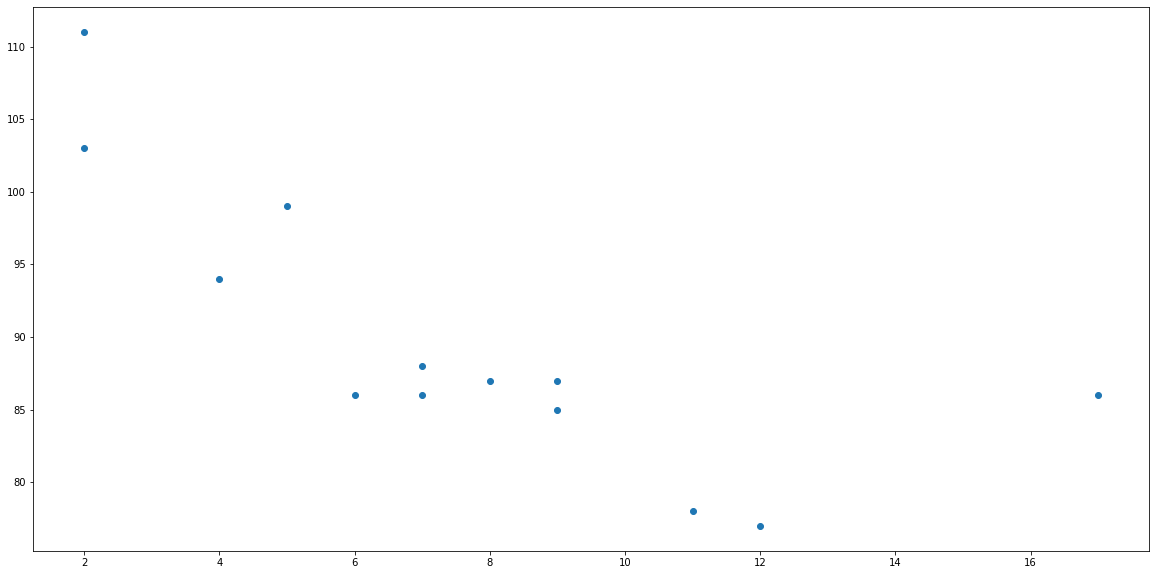

In [283]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

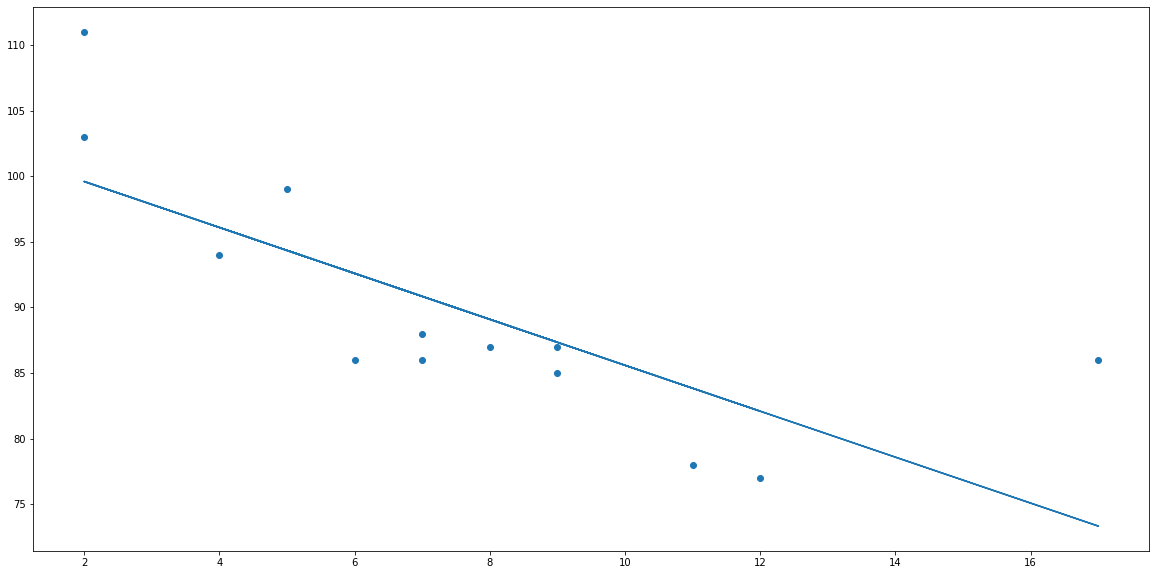

In [284]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

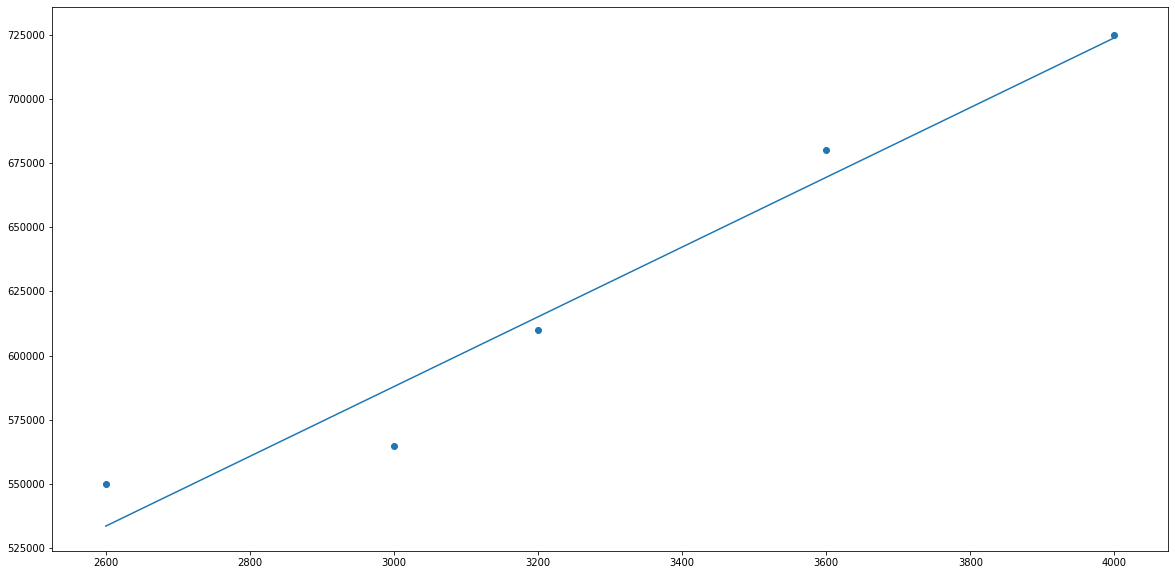

In [299]:
x=[2600,3000,3200,3600,4000]
y=[550000,565000,610000,680000,725000]
plt.scatter(x,y,marker='+',color="red")
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [58]:
from sklearn import linear_model

In [59]:
df=pd.read_excel('ml .price prediction.xlsx')

In [60]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


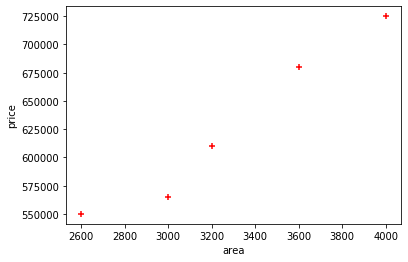

In [69]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,marker='+',color="red")

In [87]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
reg.predict([[3300]])

array([628715.75342466])

In [89]:
reg.coef_

array([135.78767123])

In [90]:
reg.intercept_

180616.43835616432

In [91]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [105]:
d=pd.read_excel("price prediction.xlsx")
d.head(3)

,area
0,1000
1,1500
2,2300


In [106]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        628715.75342466,  760429.79452055,  859554.79452055,
       1131130.1369863 ])

In [107]:
p=reg.predict(d)

In [108]:
d['prices']=p

In [109]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3300,6.287158e+05
4,4270,7.604298e+05
5,5000,8.595548e+05
6,7000,1.131130e+06


In [117]:
d.to_excel('new price prediction.xlsx')

FileCreateError: [Errno 13] Permission denied: 'new price prediction.xlsx'

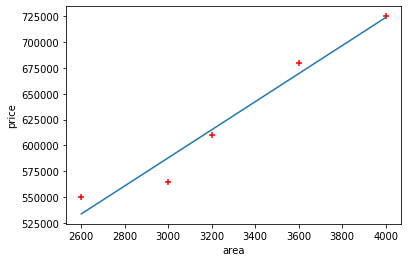

In [130]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,marker='+',color="red")
plt.plot(df.area,reg.predict(df[['area']]))